<a href="https://colab.research.google.com/github/RaianaSeixas/0_paper_one_revisited/blob/main/Pop_H_Frannk_Sphere_0_5F_DE_d10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 12.03 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight


In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 248 (delta 64), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (248/248), 654.97 KiB | 24.26 MiB/s, done.
Resolving deltas: 100% (136/136), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [3]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

fator = 1.0/2.0; 
Fi=mut;CRi=crossp;# para impressão
#fator = 2.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [4]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 19.55 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [5]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 248 (delta 64), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (248/248), 654.97 KiB | 19.26 MiB/s, done.
Resolving deltas: 100% (136/136), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One


In [6]:
############################### Função
import Function
#'''  
############################### Função
dim=10
#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel' #'Schwefel_222' Sphere
fchoice='Sphere'
Fun=Function.Sphere
MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
#fx=
#'''
#####################################
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [7]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix


In [8]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [9]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [10]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [11]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [12]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [13]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [14]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.5
Npar1= 52
Npar2= 16
Npar3= 16
Npar4= 16
Npar= 100


In [15]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 0.7435917894045512 FO= 1.544584804535836e-131
k= 1 time= 1.497126869360606 FO= 1.0959502149277745e-125
k= 2 time= 2.2525115966796876 FO= 2.553963098527747e-124
k= 3 time= 2.996297554175059 FO= 1.0450465803928203e-117
k= 4 time= 3.731857172648112 FO= 3.8151961813688713e-121
k= 5 time= 4.472877943515778 FO= 6.364571151240689e-111
k= 6 time= 5.214677886168162 FO= 9.874771567461128e-112
k= 7 time= 5.962290612856547 FO= 4.444579664645333e-122
k= 8 time= 6.704199326038361 FO= 2.5959270060033857e-111
k= 9 time= 7.457003418604533 FO= 8.288916634613521e-122
k= 10 time= 8.204438054561615 FO= 2.323600464933254e-122
k= 11 time= 8.942719240983328 FO= 9.09127415850088e-117
k= 12 time= 9.680155773957571 FO= 7.080704450537516e-124
k= 13 time= 10.415526362260183 FO= 9.179558725461273e-117
k= 14 time= 11.149105683962505 FO= 8.271564727274179e-119
k= 15 time= 11.88393983443578 FO= 4.341951141013471e-111
k= 16 time= 12.62446985244751 FO= 7.119443628586355e-119
k= 17 time= 13.365607488155366 FO=

In [16]:
#len(X2[1,:])
print(cols)

10


In [17]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [18]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0         1.738700e+02  9.530205e-01   0.00052         0.0      0.0  52.0   
1         1.648914e+02  9.038069e-01   0.00104         0.0      0.0  52.0   
2         1.541009e+02  8.446612e-01   0.00156         1.0      2.0  52.0   
3         1.470563e+02  8.060487e-01   0.00208         1.0      2.0  52.0   
4         1.408696e+02  7.721377e-01   0.00260         1.0      2.0  52.0   
...                ...           ...       ...         ...      ...   ...   
1995      8.564277e-54  4.694272e-56   1.00001         1.0      1.0  52.0   
1996      8.564277e-54  4.694272e-56   1.00001         1.0      1.0  52.0   
1997      8.564277e-54  4.694272e-56   1.00001         1.0      1.0  52.0   
1998      8.564277e-54  4.694272e-56   1.00001         1.0      1.0  52.0   
1999      8.564277e-54  4.694272e-56   1.00001         0.0      0.0  52.0   

            Fo       CRo           fmin           fmax  AD_fmin  AD_fmax  \

Text(0, 0.5, 'CR')

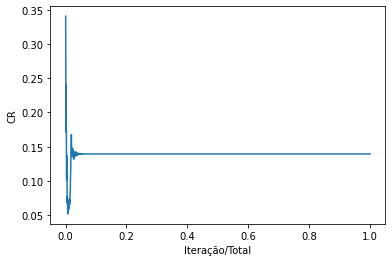

In [19]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

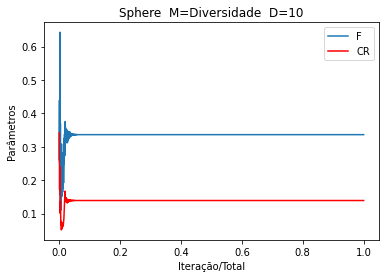

In [20]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Sphere_Diversidade_D=10')

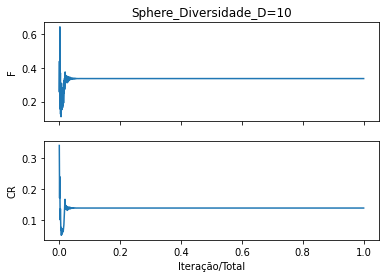

In [21]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [22]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.50 NPAR= 100 Iterações= 2000 Dim= 10 Min/Max= -100 / 100 _ Sphere
SUB_Fo-0.5_CRo-0.5_D-10_Interv-2000 

MÉDIA:  4.645677694876751e-111 STD __: 2.99501871292688e-110
MIN __: 1.544584804535836e-131 MAX__:  2.141392104411587e-109
4.645677694876751e-111
2.99501871292688e-110
1.544584804535836e-131
Tempo Médio= 44.296 segundos ---
50 Rodadas

BEST:  [ 1.31373289e-066  5.22949550e-067 -3.27124348e-066 -1.69990834e-067
 -8.23290420e-067  7.77191492e-067 -8.81670850e-067 -5.05163225e-067
 -6.09739218e-067 -1.74349915e-067  1.54458480e-131]
